In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 4s 0us/step


##### 모델 만들기

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0710 - val_accuracy: 0.9785
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0687 - val_accuracy: 0.9768
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.0691 - val_accuracy: 0.9803
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0684 - val_accuracy: 0.9818
Epoch 7/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 

##### acc와 loss 그려보자

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

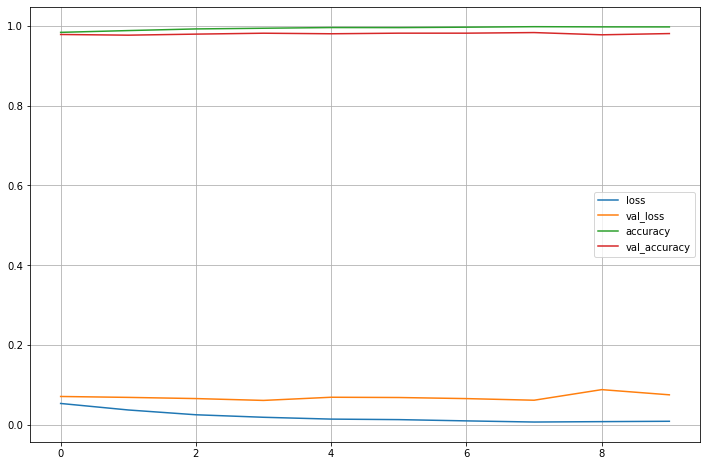

In [10]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9808
Test loss :  0.0751800462603569
Test accuracy :  0.9807999730110168


In [12]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

192

In [15]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4536,
 9749,
 2033,
 2406,
 2272,
 9749,
 5972,
 4880,
 5981,
 5973,
 1790,
 1500,
 951,
 3503,
 9770,
 9858]

##### 뭘 틀렸을까?

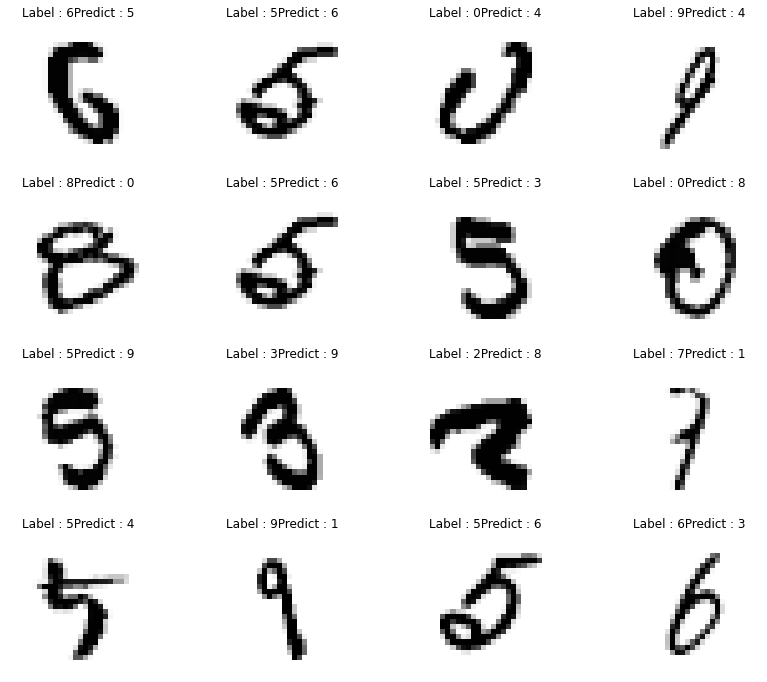

In [16]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

## MNIST fashion

In [17]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255, x_test/255

4422102/4422102 [==============================] - 1s 0us/step


In [18]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0, len(y_train)), k=16)

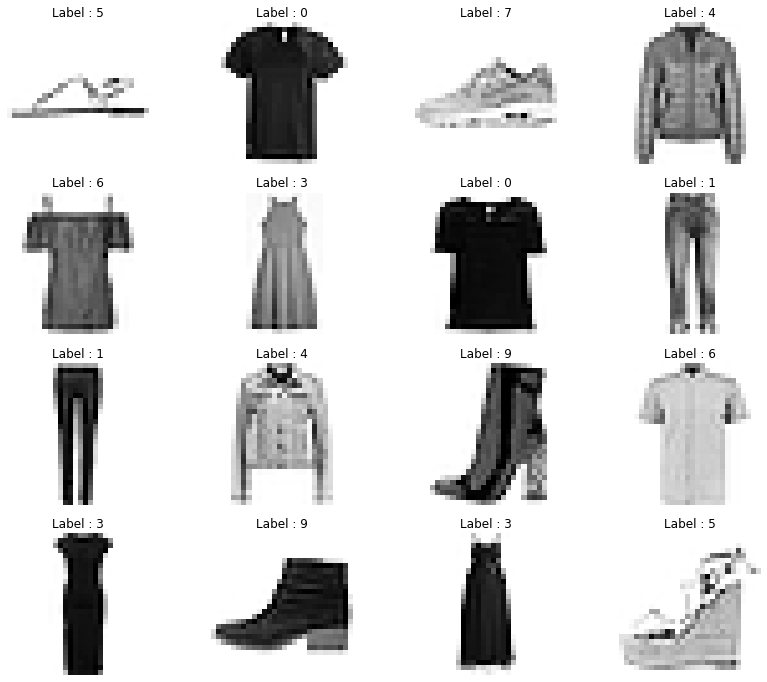

In [20]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')
    
plt.show()

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 5s 8ms/step - loss: 0.4860 - accuracy: 0.8293 - val_loss: 0.4109 - val_accuracy: 0.8509
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.3653 - accuracy: 0.8677 - val_loss: 0.3651 - val_accuracy: 0.8699
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.3241 - accuracy: 0.8824 - val_loss: 0.3602 - val_accuracy: 0.8710
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.3000 - accuracy: 0.8895 - val_loss: 0.3530 - val_accuracy: 0.8696
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2788 - accuracy: 0.8960 - val_loss: 0.3414 - val_accuracy: 0.8784
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2673 - accuracy: 0.9004 - val_loss: 0.3411 - val_accuracy: 0.8792
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2504 - accuracy: 0.9071 - val_loss: 0.3318 - val_accuracy: 0.8842
Epoch 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

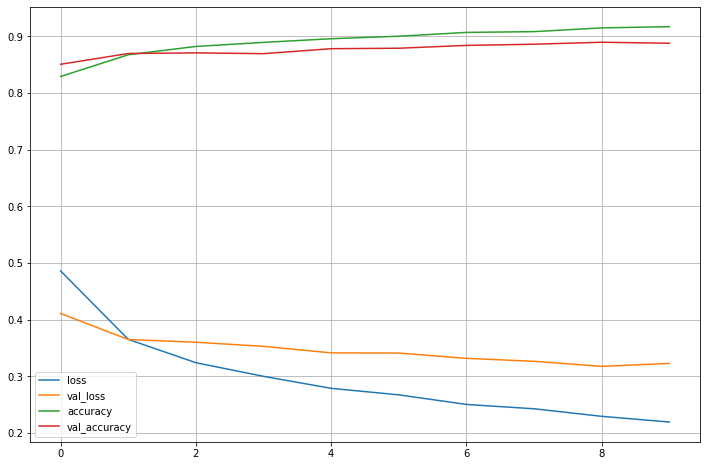

In [25]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

##### test 데이터 accuracy

In [26]:
score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8880
Test loss :  0.3228582441806793
Test accuracy :  0.8880000114440918


##### 어떤 데이터가 틀렸지?

In [27]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [28]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [29]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

1120

In [30]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[7571,
 8007,
 635,
 7591,
 3864,
 9297,
 8710,
 5484,
 4823,
 8417,
 2905,
 457,
 967,
 722,
 8429,
 6500]

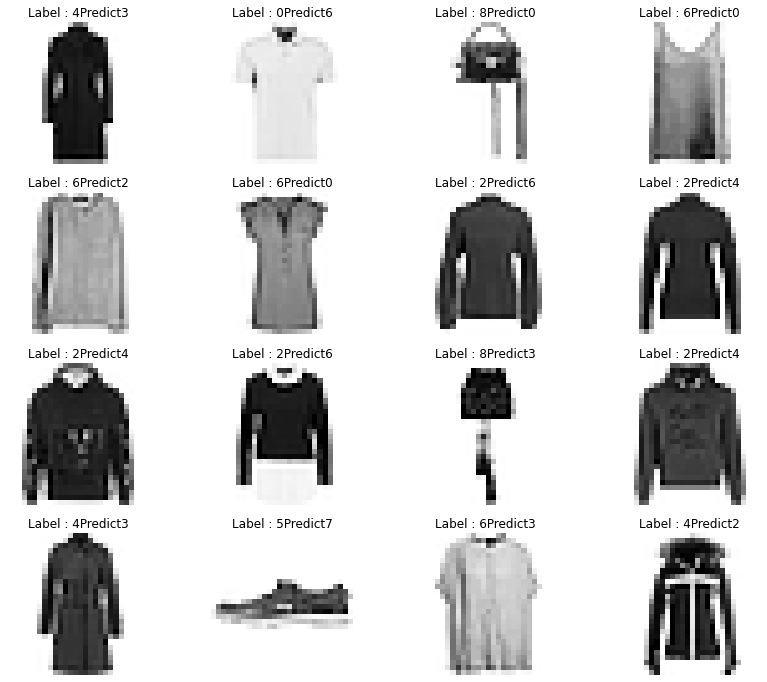

In [32]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

• 0 : 티셔츠
• 1 : 바지
• 2 : 스웨터
• 3 : 드레스
• 4 : 코트
• 5 : 샌들
• 6 : 셔츠
• 7 : 운동화
• 8 : 가방
• 9 : 부츠